<a href="https://colab.research.google.com/github/ilmechaJu/keras/blob/main/ch_01_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EA%B8%B0%EC%B4%88%EB%B6%80%ED%84%B0_%EB%AA%A8%EB%8D%B8_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스(Keras) 기초부터 모델 생성까지

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4831756648569412308, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17938743422818524563
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
## 시작 ##
import numpy as np
import tensorflow as tf

tf.__version__

'2.5.0'

레이어들을 import하는 방식 (1)
- 일일이 import 하지 않아도 됨

- 코드가 다소 길어질 수 있음

In [ ]:
from tensorflow import keras

keras.__version__

'2.5.0'

In [ ]:
keras.layers.Dense(10, activation='sigmoid')

In [ ]:
keras.Model()

In [ ]:
keras.models.Sequential()

레이어들을 import하는 방식 (2)
- 일일이 import 해야함
- 코드가 간결

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [ ]:
Dense(10, activation='relu') #유닛 10개

In [ ]:
Flatten(input_shape=[28,28])

In [ ]:
X_train = np.random.randn(5500, 2)

Input(shape=X_train.shape[1:]) #필요한 부분만 슬라이싱해서 input으로 삽입

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_1')>

## 주요 레이어

### Dense
- Fully-Connected Layer

- 노드수(유닛수), 활성화 함수 등을 지정

- name을 통한 레이어간 구분 가능

- 기본적으로  
  'Glorot_uniform' 가중치(Xavier 초기화), zeros bias로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음

In [ ]:
dense = Dense(10, activation='relu', name='Dense Layer')

In [ ]:
dense

In [ ]:
dense2 = Dense(15, activation='softmax') #유닛 5개 더늘리고, 활성함수도 바꿔보자.

In [ ]:
dense2

### Activation
- Dense layer에서 미리 활성화함수를 지정할 수도 있지만 때에 따라서 따로 레이어를 만들어줄 수 있음

In [ ]:
dense = Dense(10, kernel_initializer='he_normal', name='Dense Layer')
dense = Activation(dense)
dense

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업

- 예시)
        (128, 3, 2, 2) ---> (128, 12)
      

In [ ]:
Flatten(input_shape=(28,28)) #28 by 28

### Input 
- 모델의 입력을 정의

- shape, dtype을 포함

- 하나의 모델은 여러 개의 입력을 가질 수 있음

- summary() 메소드를 통해서는 보이지 않음

In [ ]:
input_1 = Input(shape=(28, 28), dtype=tf.float32)
input_2 = Input(shape=(8,), dtype=tf.int32)

In [ ]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_3')>

In [ ]:
input_2 

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_4')>

## 모델 구성 방법
- Sequential()

- 서브클래싱(Subclassing)

- 함수형 API

### Sequential()

- 모델이 순차적으로 진행할 때 사용

- 간단한 방법
  - Sequential 객체 생성 후, **add**를 통한 방법
  
  - Sequential 인자에 한번에 추가

- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [ ]:
#방법1) dense 뒤에 이름 랜덤 지정됨, model에 add 계속 해주는 형식이라 불편함.
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10, activation='softmax'))

모델 구조 확인
- model 객체의 **summary()** 이용

In [ ]:
model.summary() #input 은 summary()로 볼 수 없음

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_7 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_8 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


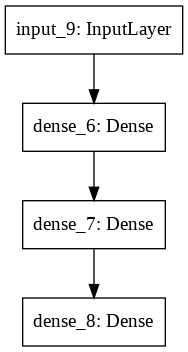

In [ ]:
plot_model(model)

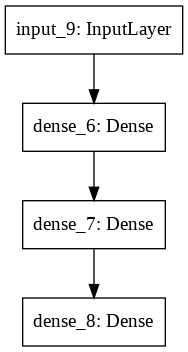

In [ ]:
plot_model(model, to_file='model1.png')

In [ ]:
!ls

model1.png  model.png  sample_data


In [ ]:
#방법2) 한번에 모두 정의o, Dense이름도 지정o
model = Sequential([Input(shape=(28,28), name = 'Input'),
                    Dense(300, activation='relu', name='Dense1'),
                    Dense(100, activation='relu', name='Dense2'),
                    Dense(10, activation='softmax', name='Output')])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


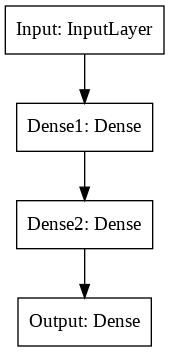

In [ ]:
plot_model(model)

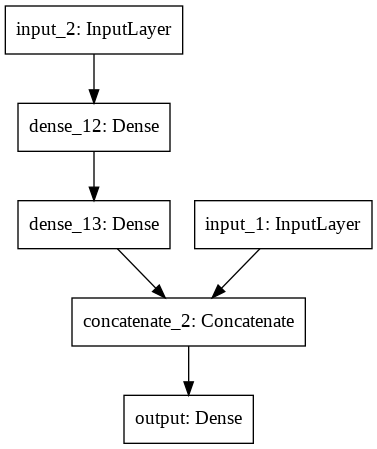

In [ ]:
plot_model(model, to_file='model2.png')

In [ ]:
!ls

model2.png  model3.png	model4.png  model5.png	model.png  sample_data


### 함수형 API

- 가장 권장되는 방벚

- 모델을 복잡하고, 유연하게 구성 가능

- 다중 입출력을 다룰 수 있음

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [ ]:
inputs = Input(shape=(28, 28, 1))

x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)


In [ ]:
model = Model(inputs=inputs, outputs=x)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


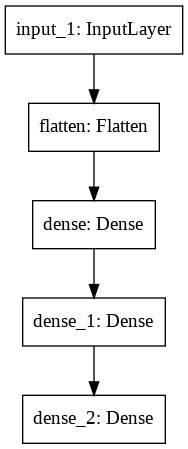

In [ ]:
plot_model(model)

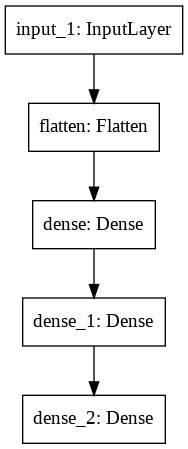

In [ ]:
plot_model(model, to_file="model3.png")

In [ ]:
!ls

model3.png  model.png  sample_data


In [ ]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28, 28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 28, 100)      2900        input_5[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 28, 30)       3030        dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 28, 58)       0           input_5[0][0]                    
                                                                 dense_9[0][0]              

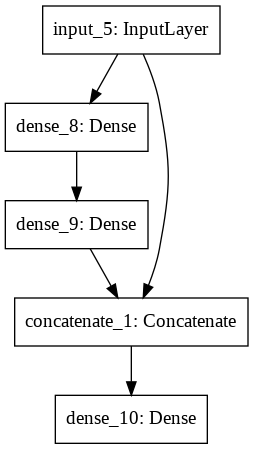

In [ ]:
plot_model(model)

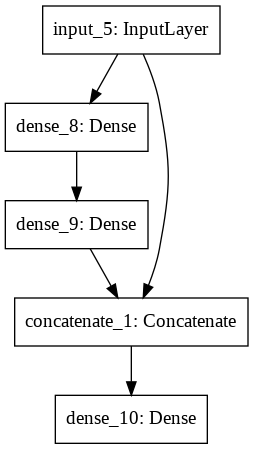

In [ ]:
plot_model(model, to_file='model4.png')

In [ ]:
!ls

model3.png  model4.png	model.png  sample_data


In [ ]:
## 입력이 여러개 ## (다중입력)
input_1 = Input(shape=(10, 10), name='input_1')
input_2 = Input(shape=(10, 28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2 )
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 10, 10)       1010        dense_12[0][0]                   
____________________________________________________________________________________________

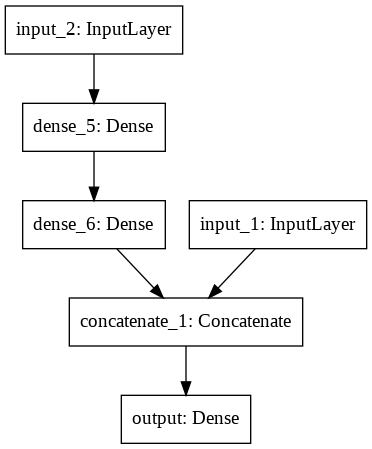

In [ ]:
plot_model(model)

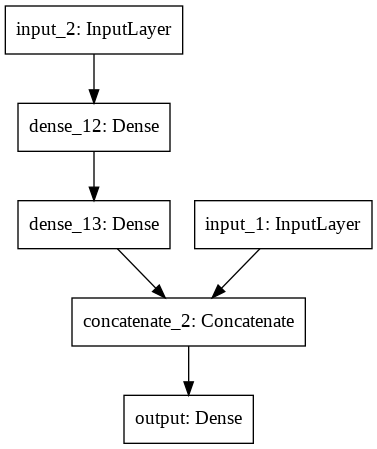

In [ ]:
plot_model(model, to_file='model5.png')

In [ ]:
!ls

model3.png  model4.png	model5.png  model.png  sample_data


In [ ]:
input_ = Input(shape=(10, 10), name='input_')

hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name="sub_output")(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10, 10)       1010        dense_14[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_15[0][0]                   
____________________________________________________________________________________________

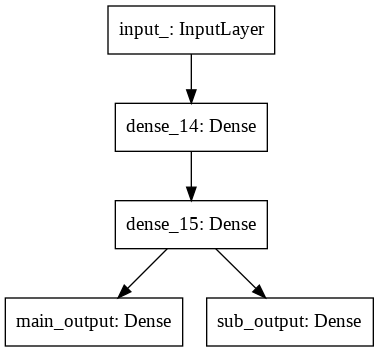

In [ ]:
plot_model(model)

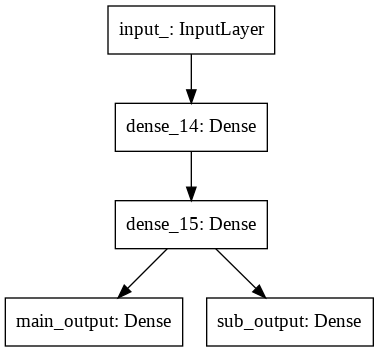

In [ ]:
plot_model(model, to_file='model6.png')

In [ ]:
input_1 = Input(shape=(10, 10), name='input_1')
input_2 = Input(shape=(10, 28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2 )
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)
sub_out = Dense(1, name='sub_output')(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 10)       1010        dense_16[0][0]                   
____________________________________________________________________________________________

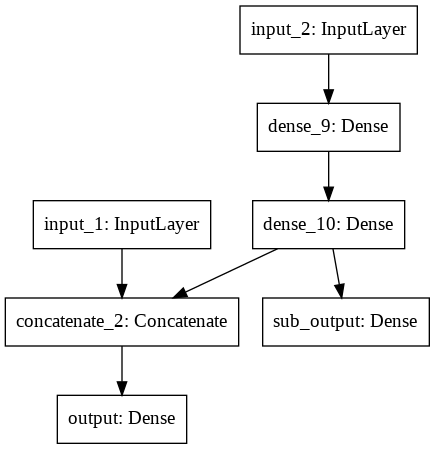

In [ ]:
plot_model(model)

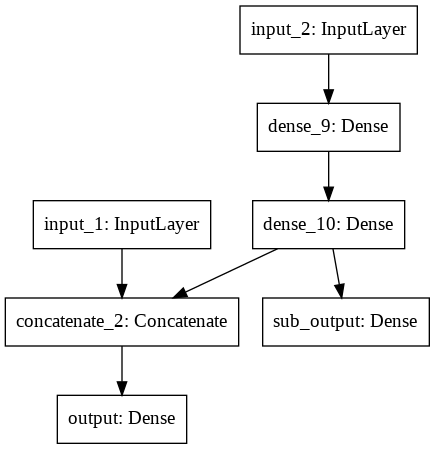

In [ ]:
plot_model(model, to_file='model7.png')

In [ ]:
!ls

model7.png  model.png  sample_data


### 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법

- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`

- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등

- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때  
  해석할 수 있어야함

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [ ]:
class MyModel(Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)

    self.dense_layer1 = Dense(300, activation=activation)
    self.dense_layer2 = Dense(100, activation=activation)
    self.dense_layer3 = Dense(units, activation=activation)

    self.output_layer = Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.dense_layer(x)
    return x

In [ ]:
#<모델 구성방법 3가지>
#sequentail(1), 함수용API(2), 서브클래싱(3)

## 모델 가중치 확인

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [ ]:
inputs = Input(shape=(28, 28, 1))

x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


모델의 레이어들이 리스트로 표현됨


In [ ]:
model.layers

In [ ]:
hidden_2 = model.layers[2]
hidden_2.name

'dense'

위의 layer name 참고

In [ ]:
model.get_layer('dense') is hidden_2

True

In [ ]:
weights, biases = hidden_2.get_weights()

In [ ]:
weights

array([[ 0.00902598, -0.04088072,  0.01104163, ...,  0.01466615,
         0.02227837,  0.02045407],
       [ 0.0124189 , -0.05846139, -0.06899317, ..., -0.0162503 ,
         0.00076805,  0.06977448],
       [-0.00156748, -0.0388663 , -0.0737369 , ...,  0.0535439 ,
        -0.03148939, -0.03143398],
       ...,
       [ 0.03079902, -0.03940975, -0.00187131, ...,  0.05656695,
         0.04921611, -0.0445601 ],
       [ 0.06113711, -0.01594807, -0.02576276, ..., -0.01046381,
         0.02781162, -0.00852531],
       [-0.03816668,  0.06603956, -0.06985486, ..., -0.04862508,
        -0.01863649,  0.01185075]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
print(weights.shape) #784 : flatten 개수 , 300: Dense 유닛의 개수
print(biases.shape)

(784, 300)
(300,)


## 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실함수(loss), 옵티마이저(optimizer)를 지정


In [ ]:
 #optimizer='rmsprop'(최적화 = rmspropagation 이 기본)
 #loss=none (손실함수 = none 이 기본)
 #sparse = 희소한 <-> Dense = 밀집한
 model.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

### 참고1

#### loss
- `keras.losses.sparse_categorical_crossentropy` 등과 같이 지정 가능
  - `sparse_categorical_crossentropy`  
    클래스가 배타적, 즉 MNIST 예제에서 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용

  - `categorical_cross_entropy`
    클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

  - `binary_crossentropy`
  이진 분류를 수행할 때 사용


#### optimizer
- `keras.optimizer.SGD()` 등과 같이 사용 가능
  - 보통 옵티마이저의 튜닝을 위해 **따로 객체를 생성**하여 컴파일    
        optimizer = keras.optimizer.SGD(learning_rate=1e-5)  
        model.compile(...,
                      optimizer=optimzer,
                      ...)

- `keras.optimizer.Adam()` 도 많이 사용

#### metrics
- 모니터링할 지표

- 주로 'accuracy', 'acc'로도 가능


### 참고2 - 컴파일 설정 예시
- 평균 제곱 오차 회귀 문제  
      model.compile(loss = 'mse',  
                    optimizer = RMSprop(),  
                    metrics=['mae'])

- 이진 분류
      model.compile(loss = 'binary_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy'])



- 다항 분류
      model.compile(loss = 'categorical_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy'])
 


## 모델 훈련, 평가 및 예측
- `fit()` 함수

  - train_data(학습 데이터), train_label(데이터의 정답)
  
  - epochs
  
  - batch_size
  
  - validation_data

- `evaluate()` 함수
  - 테스트 데이터


- `predict()`
  임의의 데이터를 인자로 넣어 예측 가능

## MNIST 예제를 통해 모델 구성하기

- keras.datasets 에 포함되어 있는 데이터셋

  <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="400">

  <sub>출처: https://www.tensorflow.org/datasets/catalog/mnist</sub>

### modules import

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터셋 로드
- MNIST 데이터셋을 로드

- Train Data 중, 30%를 검증 데이터(valiation data)로 사용


### 데이터 확인

### 데이터 전처리
- Normalization

### 모델 구성 (Sequential)

In [ ]:
model = Sequential([Input(shape=(28,28), name='input'),
                    Flatten(input_shape=[28,28], name='flatten'), ##위에는 Flatten 없음
                    Desne(100, activation='relu', name='dense1'),
                    Desne(64, activation='relu', name='dense2'),
                    Desne(32, activation='relu', name='dense3'),
                    Desne(10, activation='softmax', name='output')])
                   

NameError: ignored

### 모델 컴파일

In [ ]:
model.compile(loss='categorical_corssentropy',
              optimizer='sgd', #여기 비교(  )
              metrics=['accuracy'])

NameError: ignored

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val,y_val))

NameError: ignored

### 학습 결과 시각화

In [ ]:
history.history.keys()

NameError: ignored

### 모델 평가 (1)
- evaluate

### 학습된 모델을 통해 값 예측

### 모델 평가 (2)
- 혼동행렬 (Confusion Maxtrix)

### 모델 평가 (3)
- 분류 보고서

## 모델 저장과 복원
- `save()`

- `load_model()`

- (주의)  
  시퀀셜 API, 함수형 API에서는 **모델**의 저장 및 로드기 가능하지만 서브클래싱 방식으로는 할 수 없음  
  
  서브클래싱 방식
      save_weights()
      load_weights()  
  위 두가지를 통해 **모델의 파라미터**만 저장 및 로드


- JSON 형식
  - `model.to_json()` (저장)

  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)

  - `tf.keras.models.model_from_yaml(file_path)` (복원)


## 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음

- 여러 개 사용 가능

- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


### ModelCheckpoint

최상의 모델만을 저장
- save_best_only=True

### EarlyStopping
- 일정 에포크(patience) 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤

- 모델이 향상되지 않으면 학습이 자동으로 중지되므로,  
  에포크(epochs) 숫자를 크게 해도 무방

- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

### LearningRateScheduler

### Tensorboard
- 텐서보드를 이용하여 학습과정 모니터링

텐서보드를 사용하기 위해 logs폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

load하는데 시간 소요

- load가 안된다면 port번호를 바꿔서 실행!  
  ex) %tensorboard --logdir {log_dir} port 8000